## Chapter7.3 活性化関数

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

プロット用関数の定義

In [3]:
def plot_boundary(levels):
    # 0.05刻みのグリッド点を生成する
    xx, yy = np.meshgrid(np.arange(-5, 5, 0.05),
                         np.arange(-5, 5, 0.05))
    # 生成したグリッド点1つ1つを推論をする
    Z = predict(np.c_[xx.ravel(), yy.ravel()])

    # 描画用に2次元配列に変換
    Z = Z.reshape(xx.shape)

    # 識別領域を色別に描画
    plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.5)
    plt.colorbar(ticks=[0, 0.5, 1])

    # 識別境界を描画
    plt.contour(xx, yy, Z, colors='k', levels=levels, linestyles=['-'])

活性化関数を適用したニューラルネットワーク

In [4]:
def sigmoid(score):
    return 1. / (1. + np.exp(-score))


def predict(X_dataset):
    pred = []
    for X in X_dataset:
        a11_out = sigmoid(np.dot(w11, X) + b11)
        a12_out = sigmoid(np.dot(w12, X) + b12)
        a21_out = sigmoid(np.dot(w21, [a11_out, a12_out]) + b21)
        pred.append(a21_out)
    return np.array(pred, dtype=np.float32)

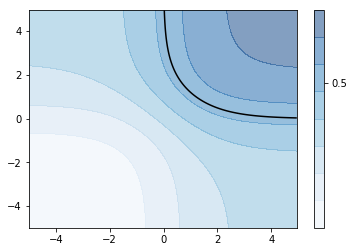

In [5]:
# 重みとバイアスを設定
w11 = [1.0, 0.0]
w12 = [0.0, 1.0]
w21 = [1.0, 1.0]
b11 = 0.
b12 = 0.
b21 = -1.5

# 識別境界は0.5の値に引く
plot_boundary([0.5])